<a href="https://colab.research.google.com/github/Rajat-44/DAI-101/blob/main/DAI_Assignment_Rajat_Badaria_23116080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Super Market Sales Analysis :**



In this notebook, we will explore a dataset of supermarket sales from three cities in Myanmar, captured in 2019.

Assignment 1 Submission - Rajat Badaria 23116080

# Importing Data to Notebook

In [563]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
db = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supermarketsales.csv")
db

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
998,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
999,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
1000,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [564]:
db.shape

(1002, 17)

In [565]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1002 non-null   object 
 1   Branch                   1002 non-null   object 
 2   City                     1002 non-null   object 
 3   Customer type            1002 non-null   object 
 4   Gender                   1002 non-null   object 
 5   Product line             1002 non-null   object 
 6   Unit price               1002 non-null   float64
 7   Quantity                 1002 non-null   int64  
 8   Tax 5%                   1002 non-null   float64
 9   Total                    997 non-null    float64
 10  Date                     1002 non-null   object 
 11  Time                     1002 non-null   object 
 12  Payment                  1002 non-null   object 
 13  cogs                     1002 non-null   float64
 14  gross margin percentage 

In [566]:
db.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [567]:
db.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1002.000000,1002.000000,1002.000000,997.000000,1002.000000,1.002000e+03,1002.000000,1002.000000
mean,55.690250,5.508982,15.387385,322.027702,307.747705,4.761905e+00,15.387385,6.972355
std,26.480959,2.926065,11.723035,245.638239,234.460696,6.131491e-14,11.723035,1.721116
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.975000,3.000000,5.864625,122.524500,117.292500,4.761905e+00,5.864625,5.500000
50%,55.230000,5.000000,12.088000,253.512000,241.760000,4.761905e+00,12.088000,7.000000
75%,77.945000,8.000000,22.475750,470.988000,449.515000,4.761905e+00,22.475750,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


**Key Takeaways:**

Total Sales: Range from 10.68 to 1039.29, with an average of $327.29.

Quantity: Customers buy 1 to 10 items, averaging 5.68.

Rating: Scores from 4 to 10, averaging 7.01

In [568]:
backupdata = db.copy

In [569]:
db.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [570]:
db['City']

,City
0,Yangon
1,Naypyitaw
2,Yangon
3,Yangon
4,Yangon
...,...
997,Naypyitaw
998,Mandalay
999,Yangon
1000,Yangon


In [571]:
db.drop(['Tax 5%'],axis=1,inplace=True)

In [572]:
db.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Total,5
Date,0


In [573]:
db.dropna(inplace=True)

In [574]:
db.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Total,0
Date,0


Checking for duplicate rows and performing data cleaning.

In [575]:
duplicate_rows = db.duplicated()
print(f"Duplicate rows present:\n{duplicate_rows}")
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Duplicate rows present:
0       False
1       False
2       False
4       False
6       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Length: 997, dtype: bool
Number of duplicate rows: 1


In [576]:
db.drop_duplicates(inplace=True)

In [577]:
duplicate_rowsafter = db.duplicated()
print(f"Duplicate rows present:\n{duplicate_rowsafter}")
print(f"Number of duplicate rows: {duplicate_rowsafter.sum()}")

Duplicate rows present:
0       False
1       False
2       False
4       False
6       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Length: 996, dtype: bool
Number of duplicate rows: 0


In [578]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               996 non-null    object 
 1   Branch                   996 non-null    object 
 2   City                     996 non-null    object 
 3   Customer type            996 non-null    object 
 4   Gender                   996 non-null    object 
 5   Product line             996 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 996 non-null    int64  
 8   Total                    996 non-null    float64
 9   Date                     996 non-null    object 
 10  Time                     996 non-null    object 
 11  Payment                  996 non-null    object 
 12  cogs                     996 non-null    float64
 13  gross margin percentage  996 non-null    float64
 14  gross income             996 n

Date is not standardized and has Object type for Dates, so convert it to a standard Date format.

In [579]:
db["Date"]

,Date
0,01-05-2019
1,03-08-2019
2,03-03-2019
4,02-08-2019
6,2/25/2019
...,...
997,1/29/2019
998,03-02-2019
999,02-09-2019
1000,2/22/2019


In [580]:
db["Date"] = db["Date"].replace("######", pd.NA)
db["Date"] = pd.to_datetime(db["Date"], errors="coerce")

In [581]:
db = db.dropna(subset=["Date"])


In [582]:
db["Date"]

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
4,2019-02-08
10,2019-02-06
...,...
987,2019-02-07
989,2019-01-03
994,2019-03-10
998,2019-03-02


In [583]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               411 non-null    object        
 1   Branch                   411 non-null    object        
 2   City                     411 non-null    object        
 3   Customer type            411 non-null    object        
 4   Gender                   411 non-null    object        
 5   Product line             411 non-null    object        
 6   Unit price               411 non-null    float64       
 7   Quantity                 411 non-null    int64         
 8   Total                    411 non-null    float64       
 9   Date                     411 non-null    datetime64[ns]
 10  Time                     411 non-null    object        
 11  Payment                  411 non-null    object        
 12  cogs                     411 non-null    

Now Date is standardised to datetime format instead of object.

In [584]:
db.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,60.8160,2019-02-06,18:07,Ewallet,57.92,4.761905,2.8960,4.5




---



# **DATA CLEANING**


# **EXPLORATORY DATA ANALYSIS**

# Univariate Analysis

Product Line Analysis


In [585]:
db['Product line'].value_counts()

,count
Product line,
Home and lifestyle,74
Fashion accessories,73
Food and beverages,71
Sports and travel,69
Electronic accessories,64
Health and beauty,60


<Axes: xlabel='Product line'>

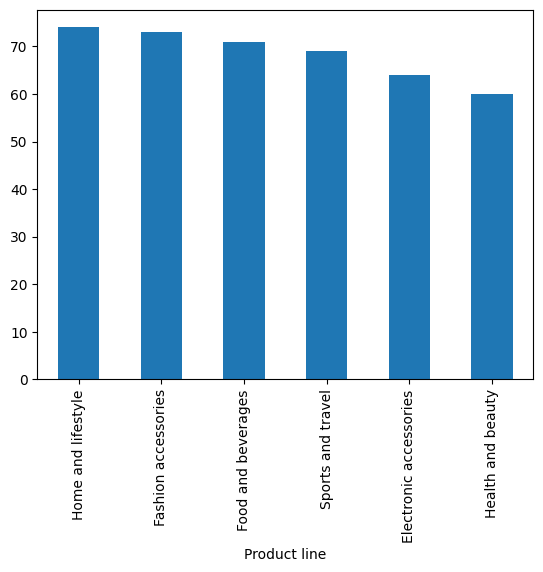

In [586]:
db['Product line'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

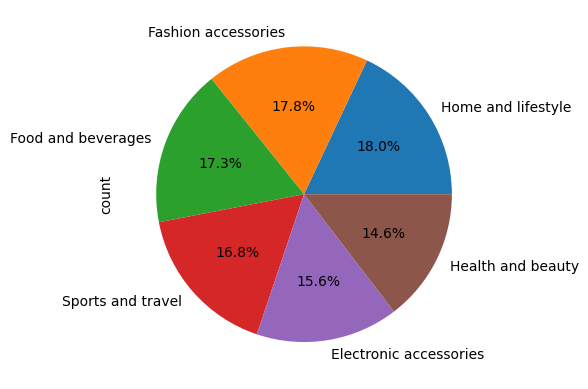

In [587]:
db['Product line'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Customer Type Analysis

In [588]:
db['Customer type'].describe()
db['Customer type'].value_counts()

,count
Customer type,
Member,214
Normal,197


<Axes: xlabel='Customer type'>

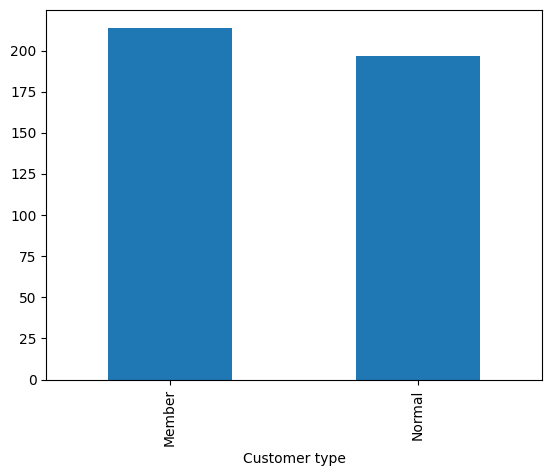

In [589]:
db['Customer type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

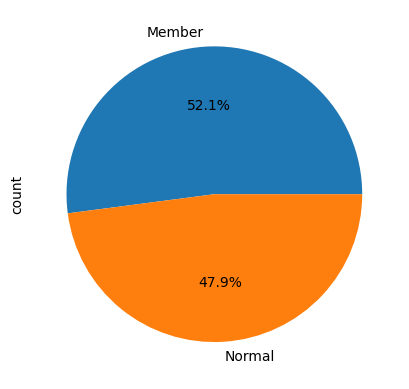

In [590]:
db['Customer type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Gender Analysis

In [591]:
db['Gender'].describe()
db['Gender'].value_counts()

,count
Gender,
Female,218
Male,193


<Axes: xlabel='Gender'>

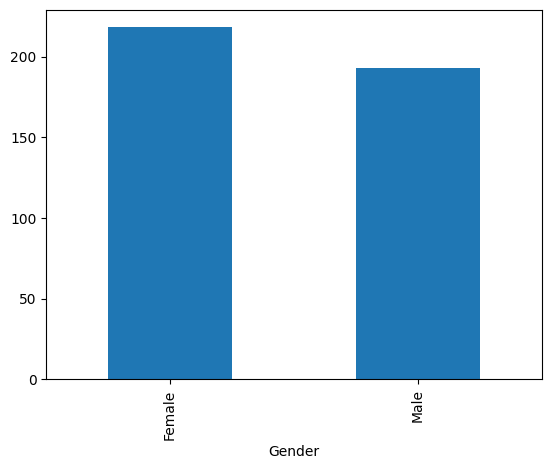

In [592]:
db['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

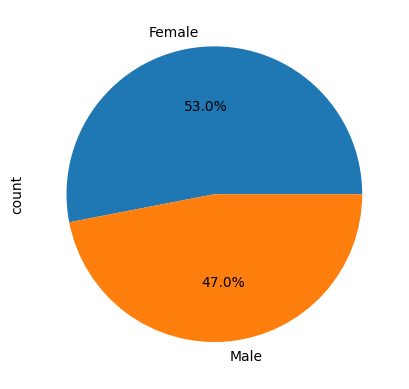

In [593]:
db['Gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

City Analysis

In [594]:
db['City'].describe()
db['City'].value_counts()

,count
City,
Mandalay,139
Yangon,137
Naypyitaw,135


<Axes: xlabel='City'>

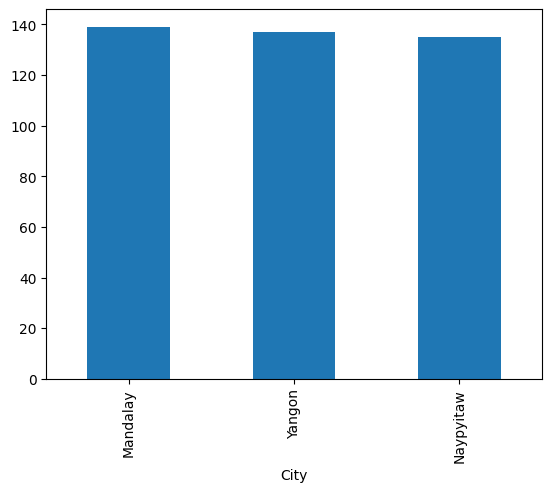

In [595]:
db['City'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

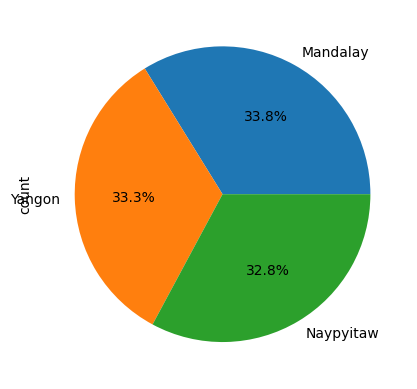

In [596]:
db['City'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Branch Analysis

<Axes: xlabel='Branch'>

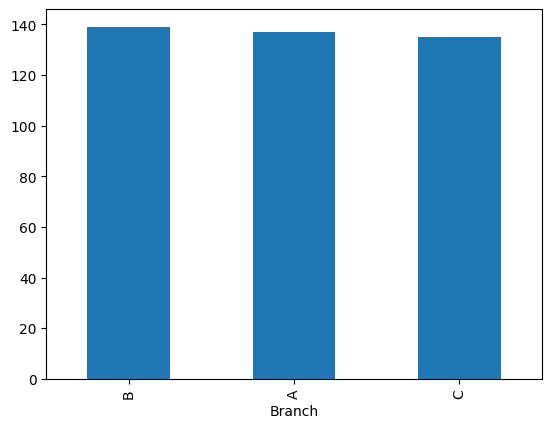

In [597]:
db['Branch'].describe()
db['Branch'].value_counts()
db['Branch'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

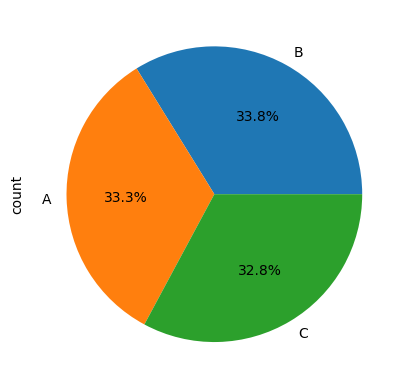

In [598]:
db['Branch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Gross Income Analysis

In [599]:
db['gross income'].describe()

,gross income
count,411.000000
mean,15.585175
std,11.949718
min,0.508500
25%,6.159750
50%,12.150000
75%,22.730250
max,49.490000


In [600]:
db['gross income'].mean()

15.58517518248175

In [601]:
db['gross income'].median()

12.15

In [602]:
db['gross income'].skew()

0.9209727145645376

<Axes: ylabel='Frequency'>

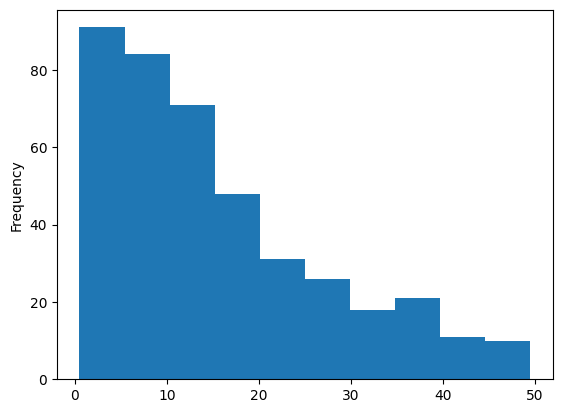

In [603]:
db['gross income'].plot(kind='hist')

<Axes: ylabel='Density'>

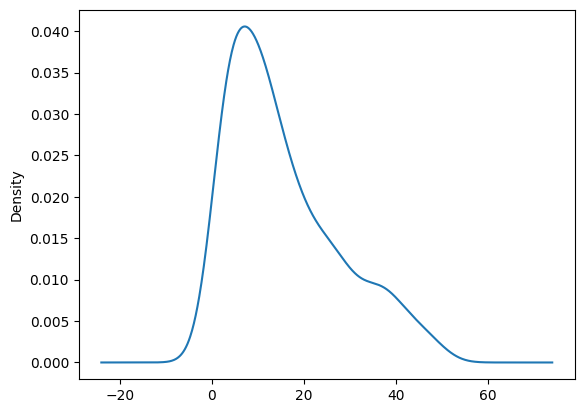

In [604]:
db['gross income'].plot(kind='kde')

<Axes: >

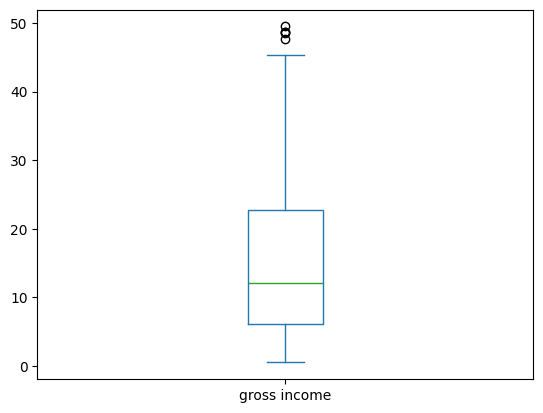

In [605]:
db['gross income'].plot(kind='box')

Total Amount Analysis

In [606]:
db['Total'].describe()


,Total
count,411.000000
mean,327.288679
std,250.944079
min,10.678500
25%,129.354750
50%,255.150000
75%,477.335250
max,1039.290000


In [607]:
db['Total'].median()

255.15

<Axes: ylabel='Frequency'>

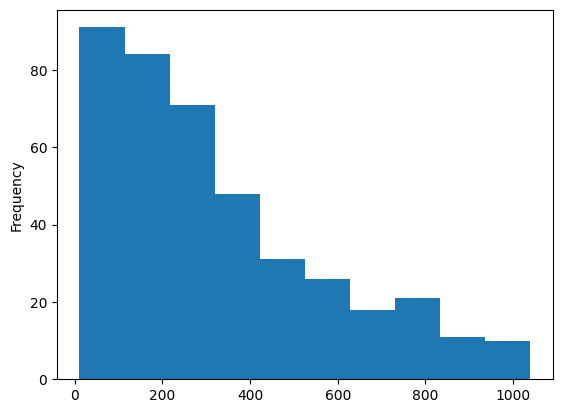

In [608]:
db['Total'].plot(kind='hist')

<Axes: ylabel='Density'>

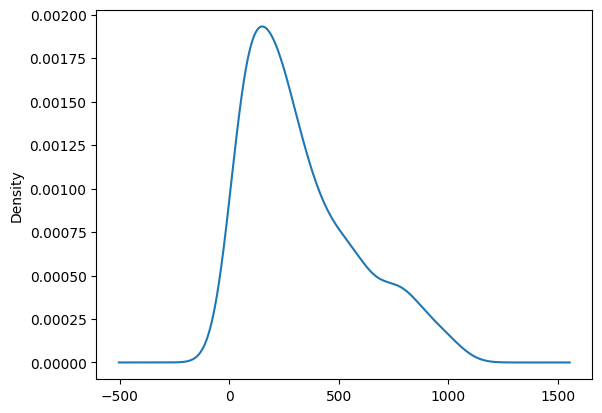

In [609]:
db['Total'].plot(kind='kde')

<Axes: >

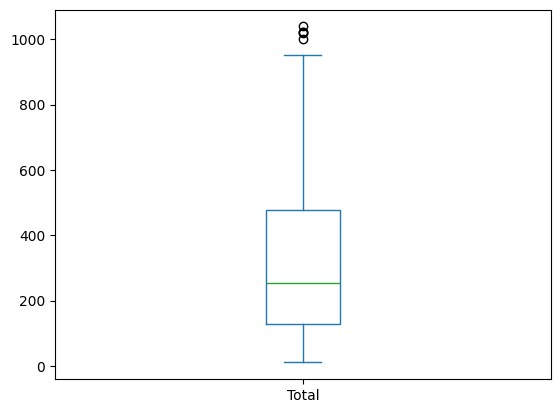

In [610]:
db['Total'].plot(kind='box')

Histogram for all the numeric data columns

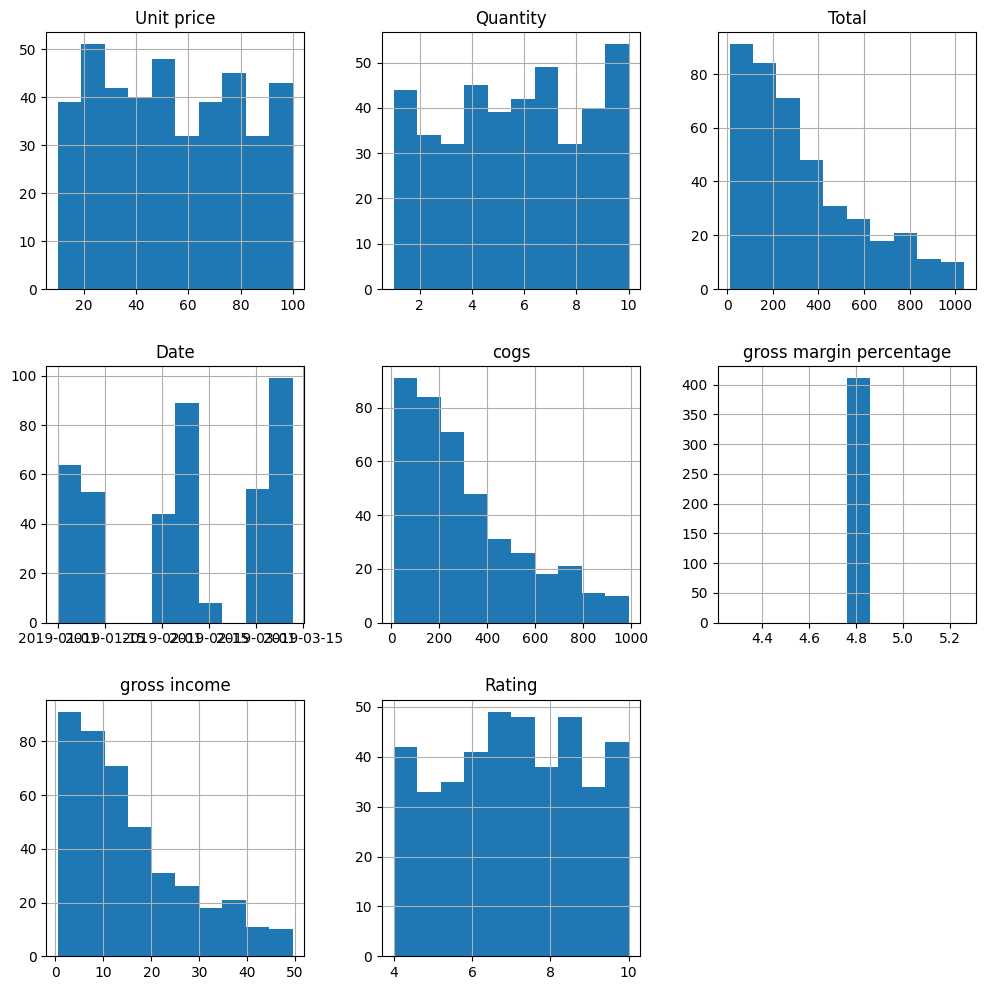

In [611]:
db.hist(figsize=(12,12))
plt.show()

Histogram for Rating and to find obtain Mean of Rating Visually

<Figure size 800x600 with 0 Axes>

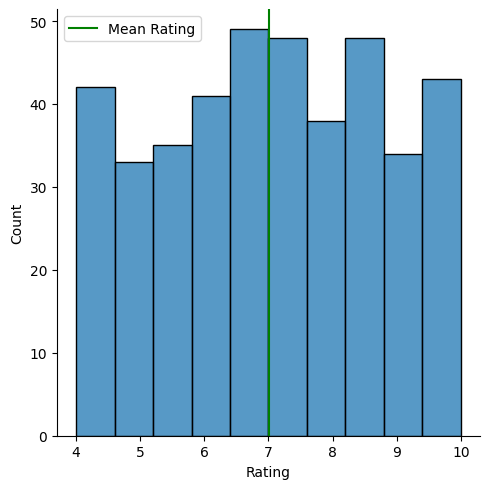

In [612]:
plt.figure(dpi=125)
sns.displot(db['Rating'],kde=False)
plt.axvline(x=np.mean(db['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()



---



# Bivariate

Creating a Correlation Matrix

In [613]:
db_numeric = db.select_dtypes(include=["number"])
correlation_matrix = db_numeric.corr()
print(correlation_matrix)


                         Unit price  Quantity     Total      cogs  \
Unit price                 1.000000  0.070817  0.676158  0.676158   
Quantity                   0.070817  1.000000  0.708912  0.708912   
Total                      0.676158  0.708912  1.000000  1.000000   
cogs                       0.676158  0.708912  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN   
gross income               0.676158  0.708912  1.000000  1.000000   
Rating                     0.027861  0.016439  0.020384  0.020384   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.676158  0.027861  
Quantity                                     NaN      0.708912  0.016439  
Total                                        NaN      1.000000  0.020384  
cogs                                         NaN      1.000000  0.020384  
gross margin percentage                      NaN           NaN       NaN

In [614]:
correlation_matrix = db[['Unit price', 'gross income']].corr()
correlation_matrix



,Unit price,gross income
Unit price,1.000000,0.676158
gross income,0.676158,1.000000


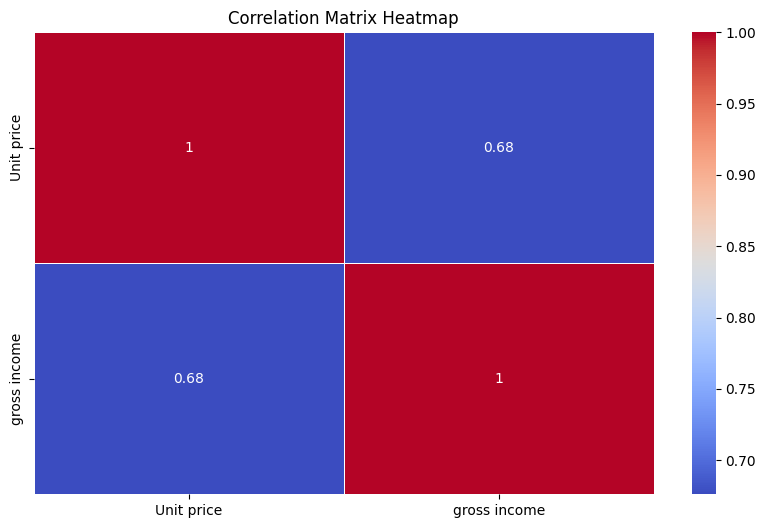

In [615]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Plot of Unit Price V/s Gross Income

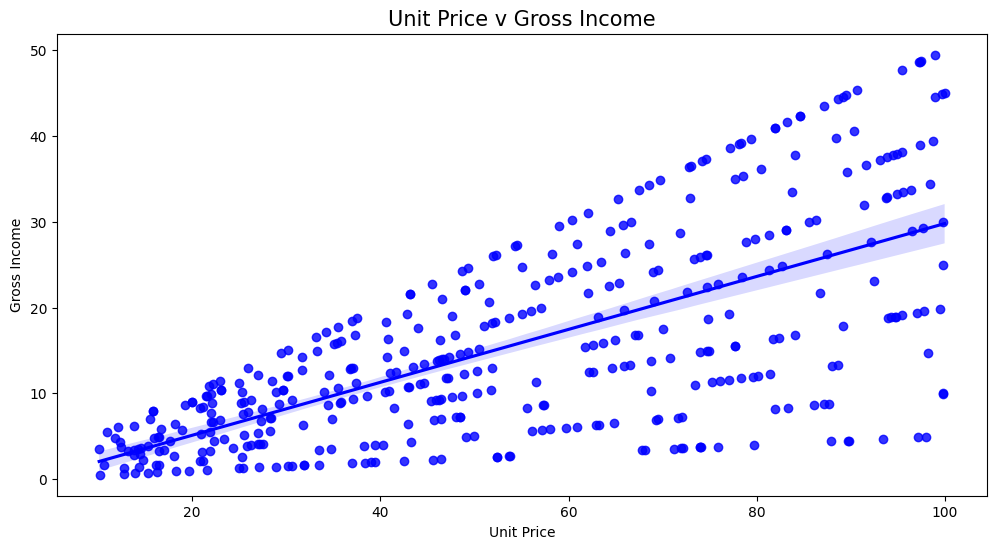

In [616]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=db,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

Plot of Quantity V/s No. of Sales of Goods

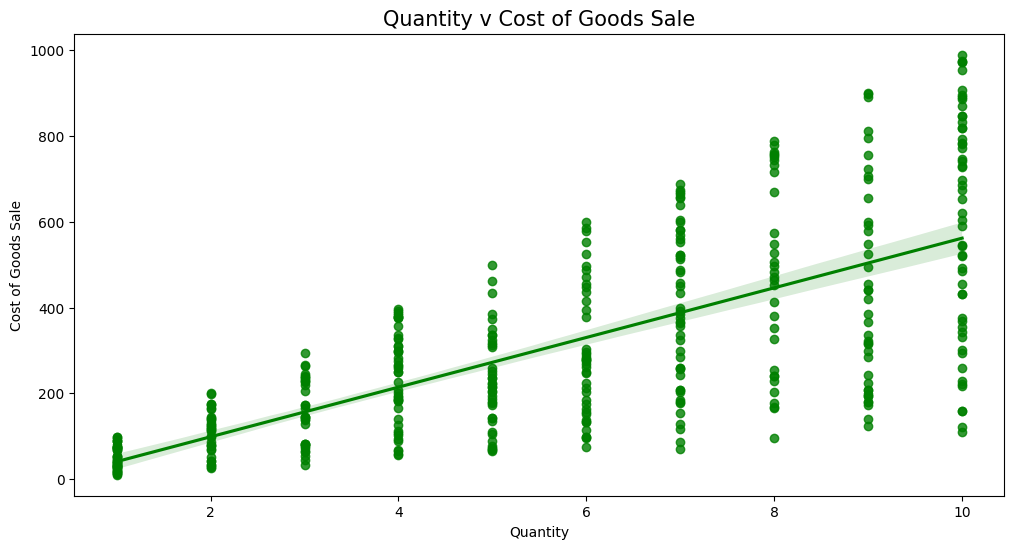

In [617]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=db,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

Total Sales V/s Payment Methods

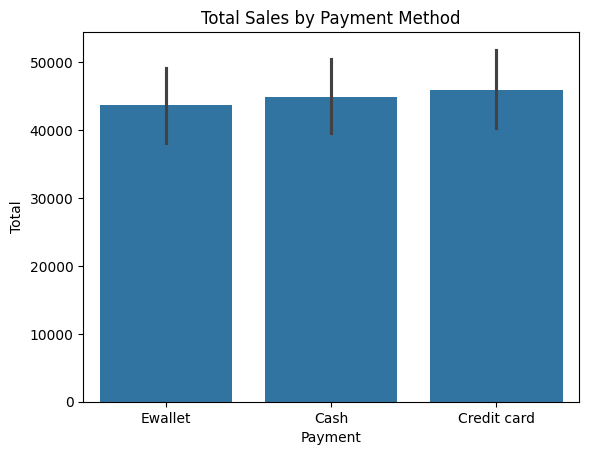

In [618]:
sns.barplot(x="Payment", y="Total", data=db, estimator=sum)
plt.title("Total Sales by Payment Method")
plt.show()

Box Plot of Product line V/s Quantity Sold

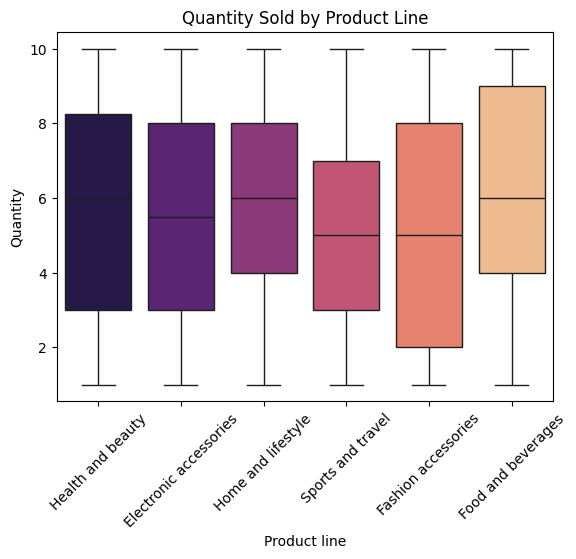

In [619]:
sns.boxplot(x="Product line", y="Quantity", data=db , palette="magma" , hue = "Product line")

plt.xticks(rotation=45)
plt.title("Quantity Sold by Product Line")
plt.show()

Box Plot of Customer Type V/s Gross Income

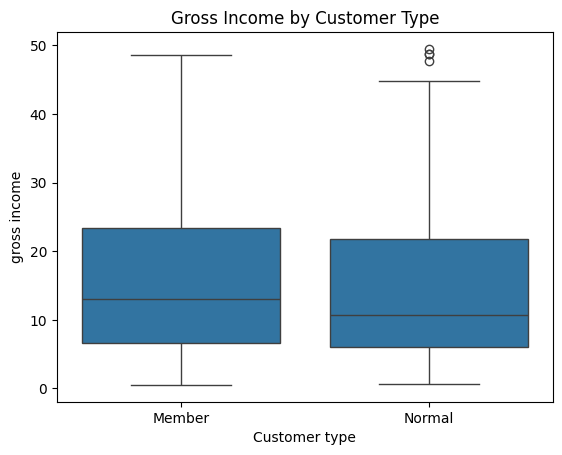

In [620]:
sns.boxplot(x="Customer type", y="gross income", data=db)
plt.title("Gross Income by Customer Type")
plt.show()


Violin Plot of Gender V/s Rating

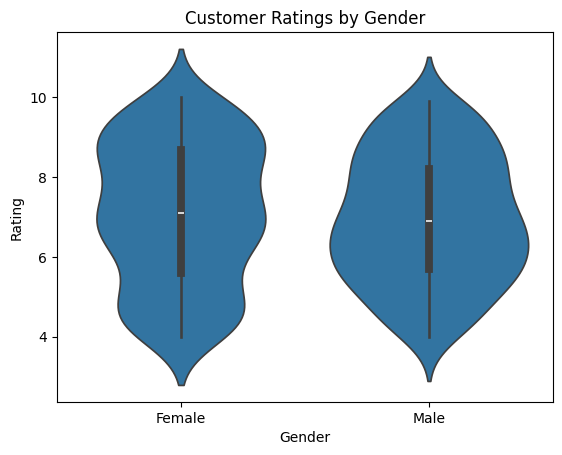

In [621]:
sns.violinplot(x="Gender", y="Rating", data=db)
plt.title("Customer Ratings by Gender")
plt.show()


Plot of Total Sales based on Hour of the day.

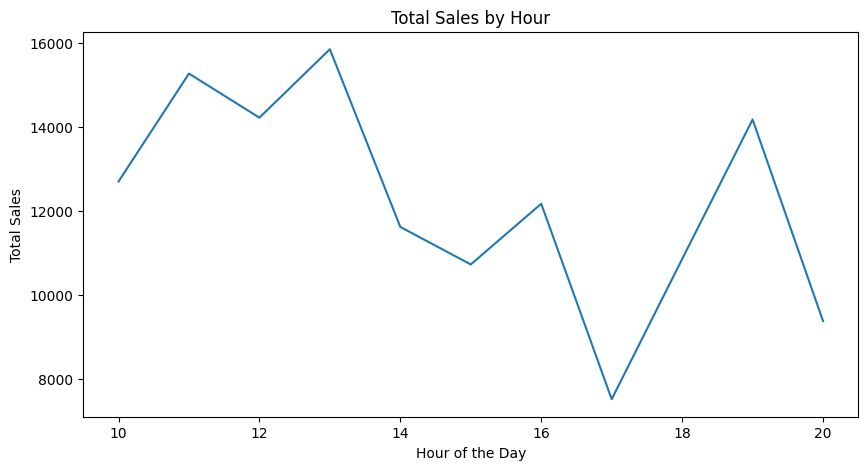

In [622]:
db_filtered = db.copy()
db_filtered["Hour"] = pd.to_datetime(db_filtered["Time"], format="%H:%M").dt.hour

db_filtered.groupby("Hour")["Total"].sum().plot(kind="line", title="Total Sales by Hour", figsize=(10, 5))
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.show()


Heatmap of Payment method V/s Customer Type

<Axes: xlabel='Payment', ylabel='Customer type'>

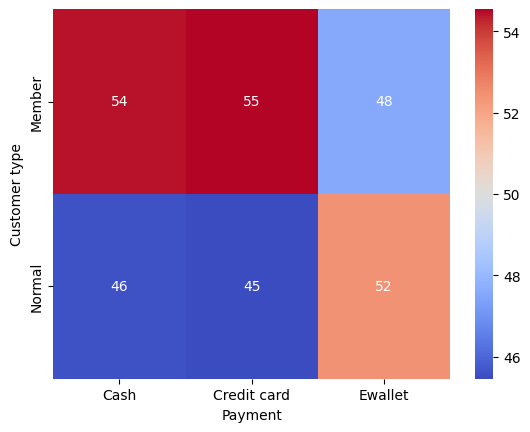

In [623]:
sns.heatmap(pd.crosstab(db['Customer type'], db['Payment'], normalize='columns') * 100, annot=True, cmap="coolwarm")


Heatmap of Payment Line V/s Gender

<Axes: xlabel='Product line', ylabel='Gender'>

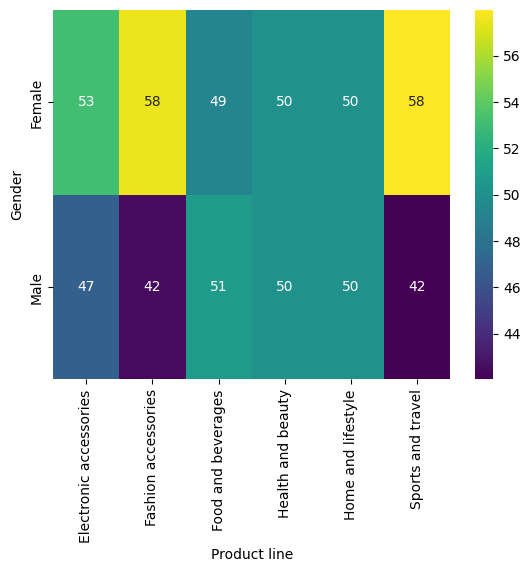

In [624]:
sns.heatmap(pd.crosstab(db['Gender'], db['Product line'], normalize='columns') * 100, annot=True, cmap="viridis")


Heatmap of Payment method V/s Day of the Week

<Axes: xlabel='Payment', ylabel='Date'>

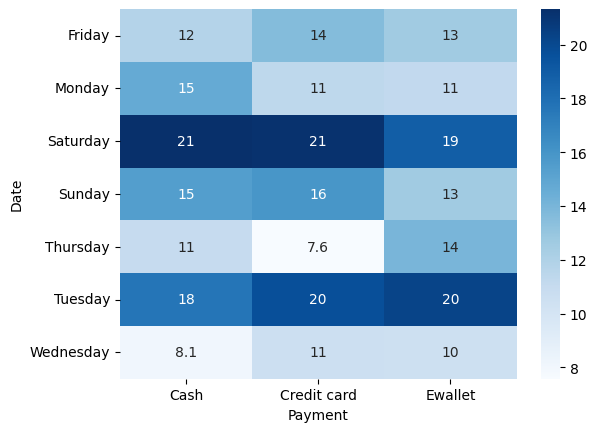

In [625]:
sns.heatmap(pd.crosstab(db['Date'].dt.day_name(), db['Payment'], normalize='columns') * 100, annot=True, cmap="Blues")


Hexbin Graph of Unit Price V/s Gross Income

Text(0.5, 1.0, '2D Histogram (Hexbin Plot) between Unit Price and Gross Income')

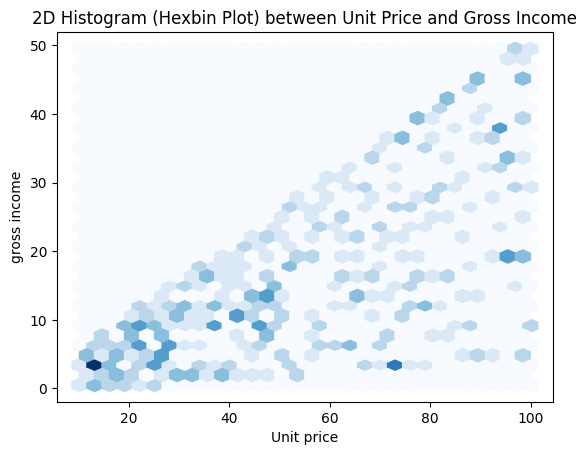

In [626]:
plt.hexbin(db['Unit price'], db['gross income'], gridsize=30, cmap='Blues')
plt.xlabel('Unit price')
plt.ylabel('gross income')
plt.title('2D Histogram (Hexbin Plot) between Unit Price and Gross Income')

In [627]:
result=db.groupby('Product line').agg(
    min_price=('Unit price', 'min'),
    max_price=('Unit price', 'max'),
    price_range=('Unit price', lambda x: x.max() - x.min()),
    mean_price=('Unit price', 'mean'),
    median_price=('Unit price', 'median'),
    count_sales=('Unit price', 'count'),
    std_price=('Unit price', 'std')
).reset_index()

result

,Product line,min_price,max_price,price_range,mean_price,median_price,count_sales,std_price
0,Electronic accessories,10.59,99.73,89.14,50.332500,46.485,64,27.227774
1,Fashion accessories,12.78,99.82,87.04,58.366438,56.470,73,25.728306
2,Food and beverages,10.13,99.79,89.66,52.709718,48.500,71,27.196920
3,Health and beauty,13.85,99.83,85.98,53.784667,56.595,60,24.764401
4,Home and lifestyle,12.12,97.94,85.82,53.351081,48.345,74,25.907612
5,Sports and travel,10.17,99.96,89.79,54.614058,54.550,69,26.267938


Graphs Between Total Sales V/s Unit Price

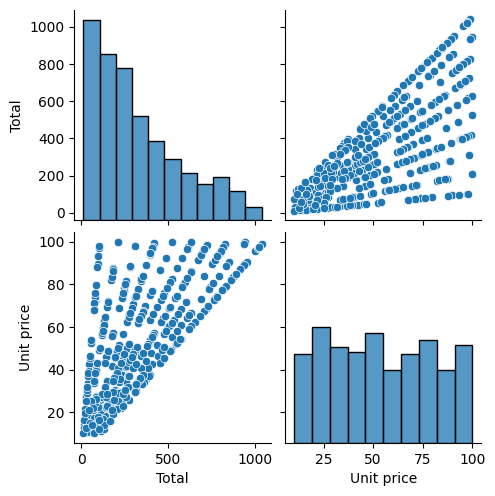

In [628]:
sns.pairplot(db[['Total', 'Unit price']])


Box Plot Total Sales V/s Payment Method

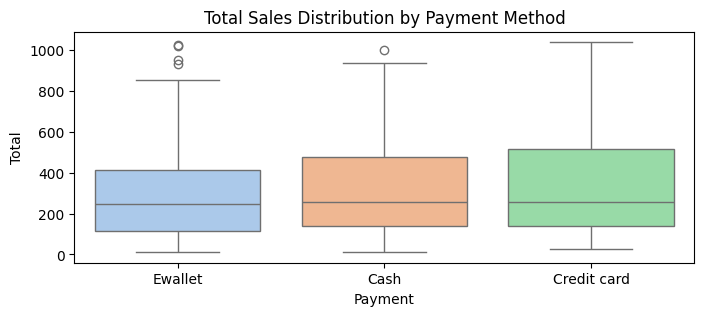

In [629]:
plt.figure(figsize=(8, 3))
sns.boxplot(x="Payment", y="Total", data=db, palette="pastel",hue="Payment")
plt.title("Total Sales Distribution by Payment Method")
plt.show()


Horizontal Histograph Between Gender Count and Product Type

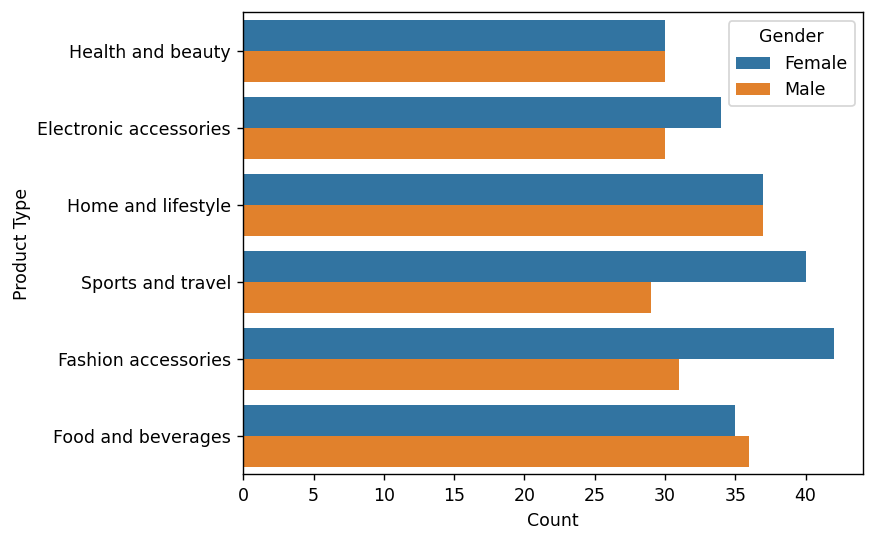

In [630]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = db)
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Bar Plot between Product Line and Total Sales

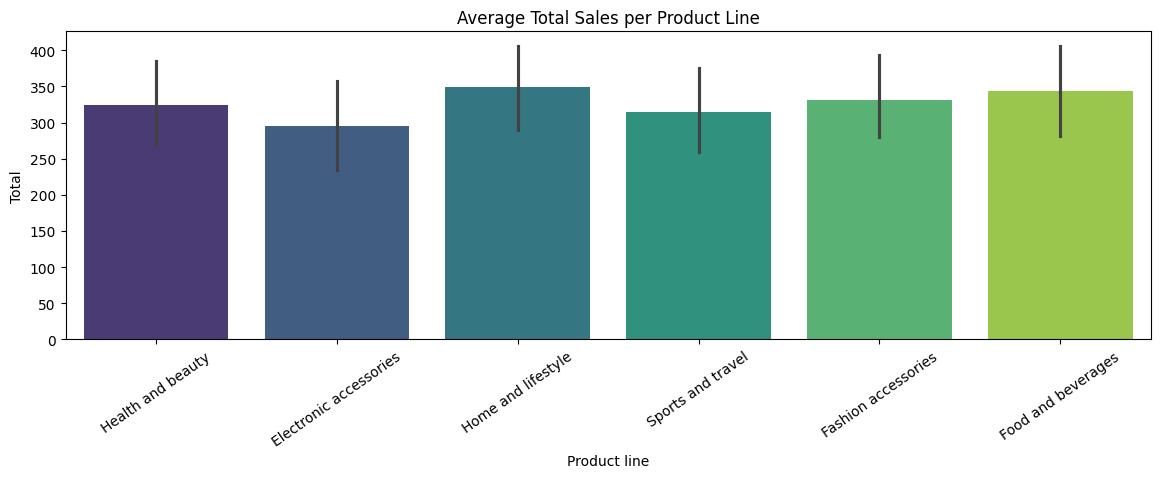

In [631]:
plt.figure(figsize=(14, 4))
sns.barplot(x="Product line", y="Total", data=db, estimator=np.mean, palette="viridis" , hue="Product line")
plt.title("Average Total Sales per Product Line")
plt.xticks(rotation=35)
plt.show()


Gross Income Distribution by City

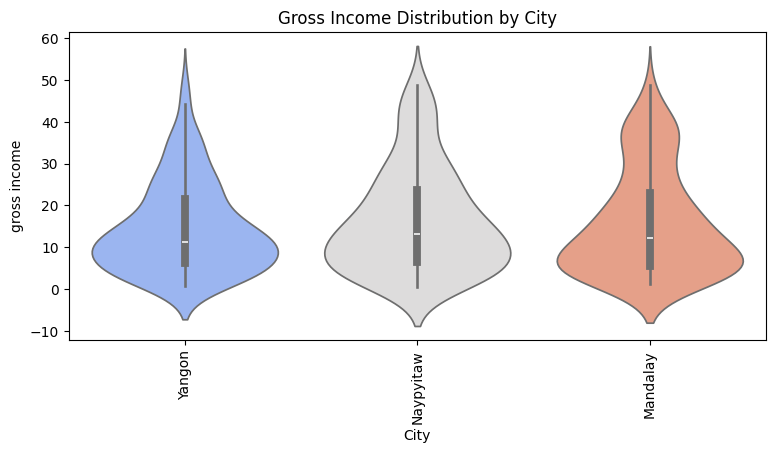

In [632]:
plt.figure(figsize=(9, 4))
sns.violinplot(data=db, x='City', y='gross income', hue='City', palette='coolwarm')
plt.title('Gross Income Distribution by City')
plt.xticks(rotation=90)
plt.show()


Unit Price vs Rating ScatterPlot

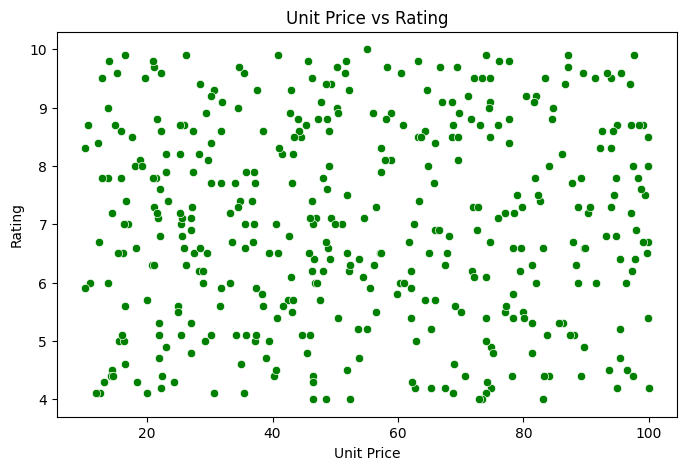

In [633]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Unit price", y="Rating", data=db, color="green")
plt.title("Unit Price vs Rating")
plt.xlabel("Unit Price")
plt.ylabel("Rating")
plt.show()


Barplot of Average Rating by Product Line

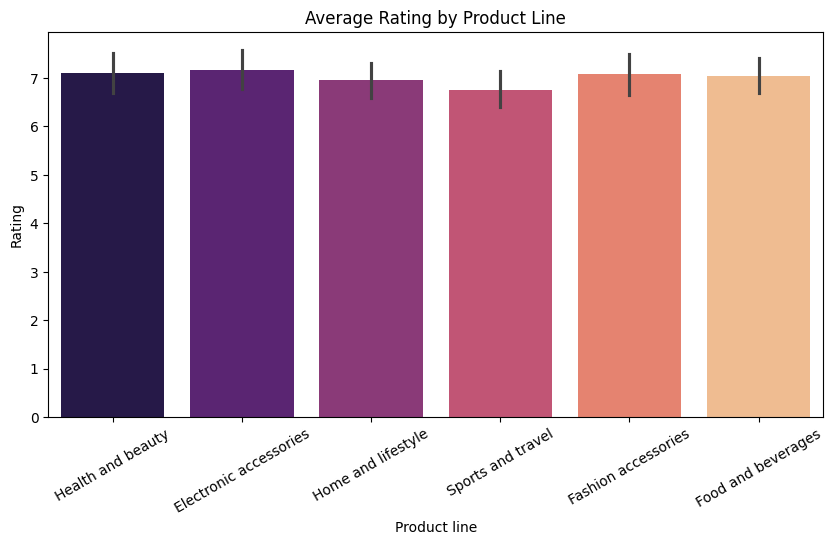

In [634]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Product line", y="Rating", data=db, palette="magma",  hue = "Product line" )
plt.title("Average Rating by Product Line")
plt.xticks(rotation=30)
plt.show()




---



# Multivariate

Plot shows relationships between Gross Income and Unit Price,colored by Gender.

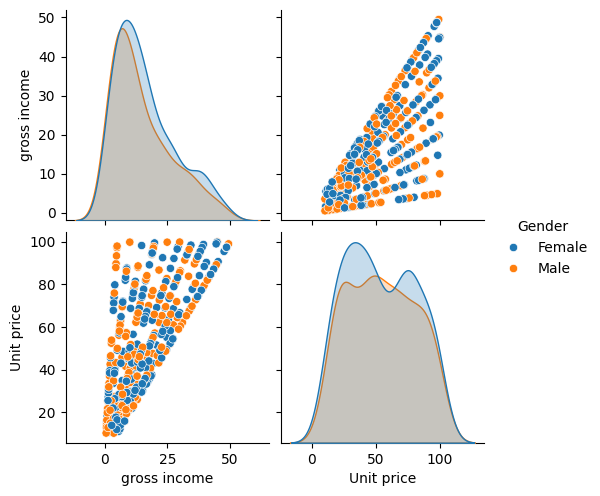

In [635]:
sns.pairplot(db[['gross income', 'Unit price','Gender']], hue='Gender')
plt.show()

Plot shows relationship between Total Sales V/s Gross Income by Payment Method, Quantity, and Gender.


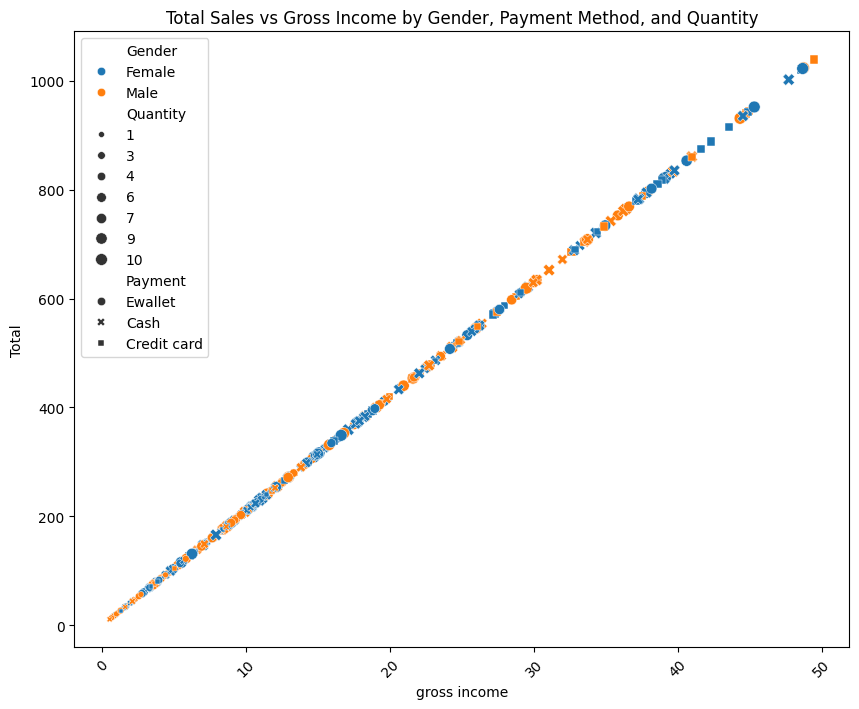

In [636]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=db, x="gross income", y="Total", hue="Gender", style="Payment", size="Quantity")
plt.title("Total Sales vs Gross Income by Gender, Payment Method, and Quantity")
plt.xticks(rotation=45)
plt.show()


Plot shows relationship between Total Sales and Unit Price, Product Line, Gender.


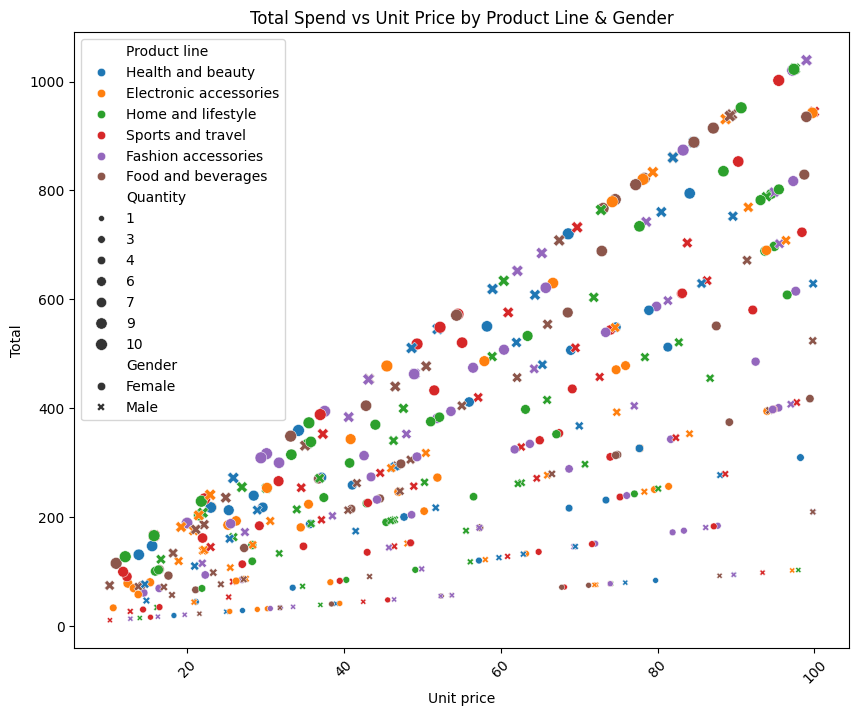

In [637]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=db, x="Unit price", y="Total", hue="Product line", style="Gender", size="Quantity")
plt.title("Total Spend vs Unit Price by Product Line & Gender")
plt.xticks(rotation=45)
plt.show()


Plot shows relationship between Total Sales by Hour with Gender, Payment Method and Quantity

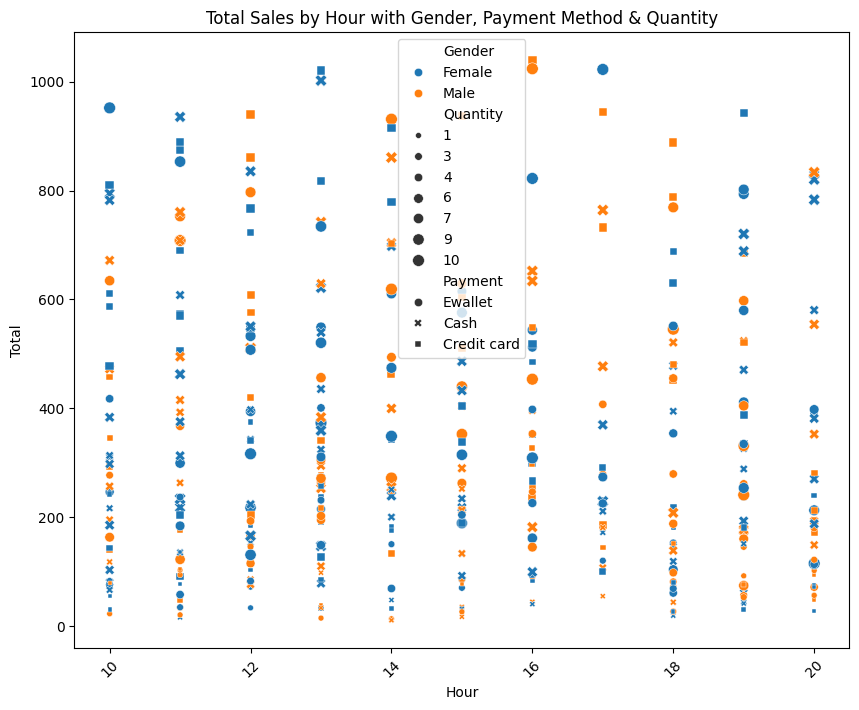

In [638]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=db_filtered, x="Hour", y="Total", hue="Gender", style="Payment", size="Quantity")
plt.title("Total Sales by Hour with Gender, Payment Method & Quantity")
plt.xticks(rotation=45)
plt.show()


Plot shows relationship between Product Line v/s Unit Price, and Gender.


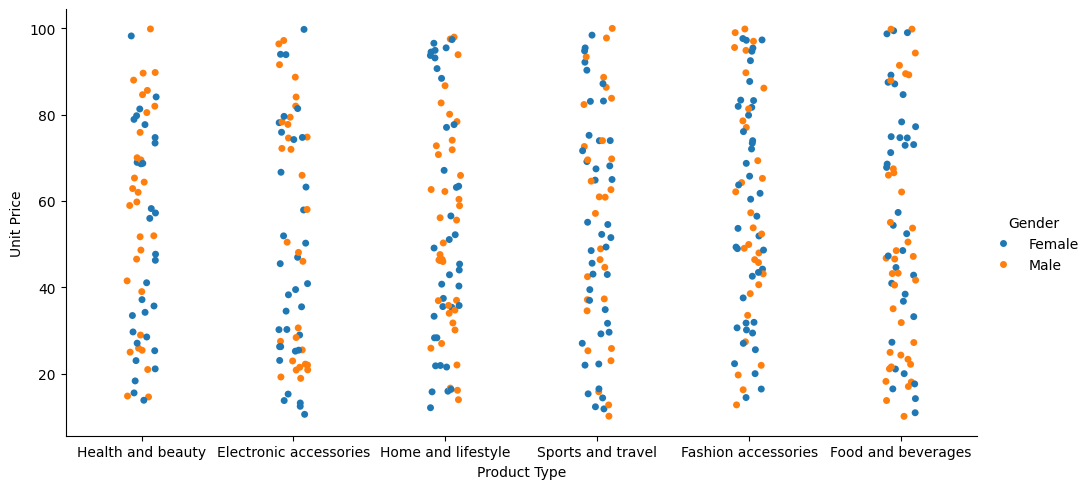

In [639]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=db,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

Plot shows relationship between Product Line v/s Unit Price, and City.


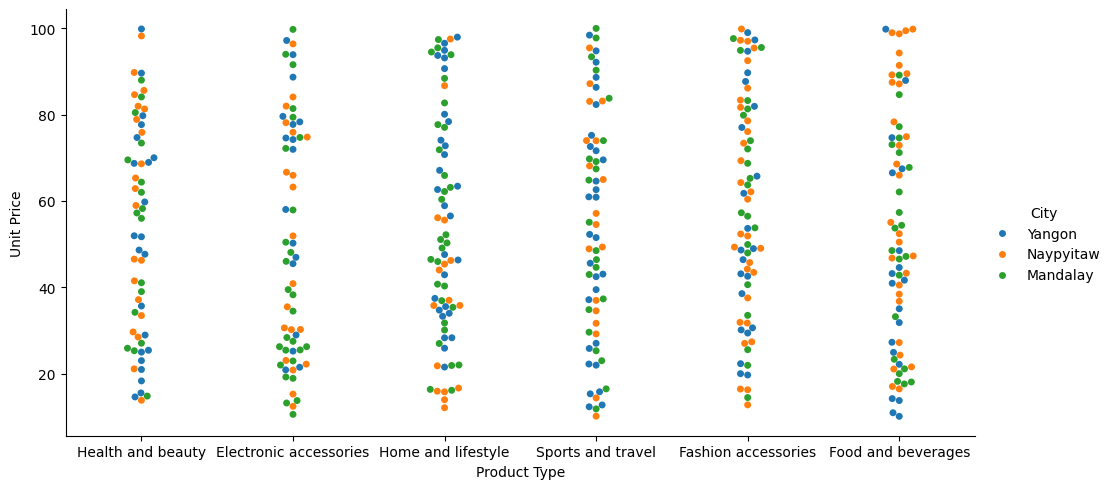

In [640]:
sns.catplot(x='Product line',y='Unit price',hue='City',kind='swarm',data=db,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()



---

